#Objective:
- The objective of this ipynb notebook is to create a model which classifies sms messages as spam or ham.
- For this first I'll be exploring all the nlp techniques to undrstand the dataset .
- Next we'll compare some existing model performance and choose the best model

In [69]:
# Importing nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
## Reading the raw dataset
rawData= open("/content/drive/MyDrive/Colab Notebooks/SMSSpamCollection.tsv").read()

In [37]:
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [38]:
# replacing the tabs in the raw dataset
parsed_data = rawData.replace('\t','\n').split('\n')

In [39]:
parsed_data[0:5]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam']

In [40]:
#Splitting the list into text and the label
labels= parsed_data[0:-1:2]
text= parsed_data[1::2]

In [41]:
print(len(labels))
print(len(text))

5574
5574


In [44]:
#converting to dataframe
import pandas as pd
#spam_dataset = pd.DataFrame({'labels':labels,'text':text},columns=['labels','text'])

In [45]:
# Alternative method to read raw data and make it structured is through pandas
spam_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMSSpamCollection.tsv",sep='\t',header=None,names=['label','body_text'])

In [46]:
spam_dataset.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA - Lets Explore the dataset

In [47]:
# what is the shape of the dataset?
print("Input data has {} rows and {} columns".format(spam_dataset.shape[0],spam_dataset.shape[1]))

Input data has 5572 rows and 2 columns


In [48]:
# How many spam/ham are there?
print("out of {} rows {} are spam and {} are ham".format(len(spam_dataset),
                                                         len(spam_dataset[spam_dataset['label']=='spam']),
                                                         len(spam_dataset[spam_dataset['label']=='ham'])))

out of 5572 rows 747 are spam and 4825 are ham


In [49]:
# How much missing data is there?

print("Number of null in label: {}".format(spam_dataset['label'].isnull().sum()))
print("Number of null in text: {}".format(spam_dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


# Implementing a pipeline to clean text

## Prepocessing Text Data
Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. **Lemmatize/Stem**


# Removing Punctuation

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def remove_punctuation(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

spam_dataset['body_text_clean']=spam_dataset['body_text'].apply(lambda x:remove_punctuation(x))

In [53]:
spam_dataset.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


# Tokenization

In [55]:
import re

def tokenize(text):
  tokens=re.split('\W+',text)
  return tokens

spam_dataset['body_text_tokenized']=spam_dataset['body_text_clean'].apply(lambda x:tokenize(x))

In [56]:
spam_dataset.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


# Removing Stopwords

In [59]:
stopwords = nltk.corpus.stopwords.words('english')

In [61]:
def remove_stopwords(tokenized_list):
  text=[i for i in tokenized_list if i not in stopwords]
  return text

spam_dataset['body_text_nostop']=spam_dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))

In [62]:
spam_dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


# Stemming

In [64]:
ps = nltk.PorterStemmer()

In [65]:
def stemming(text):
  stemmed_text = [ps.stem(word) for word in text]
  return stemmed_text

spam_dataset['body_text_stemmed']=spam_dataset['body_text_nostop'].apply(lambda x:stemming(x))

In [66]:
spam_dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ..."


# Lemmatization

In [67]:
wn = nltk.WordNetLemmatizer()


In [70]:
def lemmatizing(text):
  lemmatized_text = [wn.lemmatize(word) for word in text]
  return lemmatized_text

spam_dataset['body_text_lemmatized']=spam_dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))

In [72]:
spam_dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t..."


**Note:** When comparing stemming and lemmatization, lemmatization generally provides better results in natural language processing tasks. This is because:

  - Stemming is a more rudimentary approach that simply removes prefixes or suffixes from words to reduce them to a base or "stem" form. It often results in words that are not actual valid words (e.g., "running" becomes "run" or "runn").

  - Lemmatization, on the other hand, uses linguistic knowledge and considers the context of the word. It reduces a word to its base or dictionary form, called the lemma, which is always a valid word. For example, "running" would be reduced to "run," and "better" would be reduced to "good."

# Exploring different types of vectorization

# Count Vectorization
Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.


In [74]:
from sklearn.feature_extraction.text import CountVectorizer


In [73]:
# function to remove punctuation, tokenize, remove stopwords, and stem
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [75]:
# Applying count vector to a small sample of the dataset
sample_spam = spam_dataset[0:20]
count_vect = CountVectorizer(analyzer=clean_text)
x_counts = count_vect.fit_transform(sample_spam['body_text'])
print(x_counts.shape)
print(count_vect.get_feature_names_out())

(20, 221)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150' '150pday' '16' '2' '20000' '2005' '21st' '3' '4'
 '4403ldnw1a7rw18' '4txtú120' '6day' '81010' '87077' '87121' '87575' '9'
 '900' 'aid' 'alreadi' 'amor' 'anymor' 'appli' 'around' 'avail' 'b' 'back'
 'bless' 'breather' 'brother' 'buffet' 'bugi' 'c' 'call' 'caller'
 'callertun' 'camera' 'cash' 'chanc' 'chg' 'cine' 'claim' 'click' 'co'
 'code' 'colour' 'comp' 'copi' 'cost' 'crazi' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'darl' 'date' 'dont' 'dun' 'e' 'earli' 'eg' 'eh' 'england'
 'enough' 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine' 'free'
 'freemsg' 'friend' 'fulfil' 'fun' 'go' 'goalsteam' 'goe' 'gonna' 'got'
 'gota' 'grant' 'great' 'help' 'hey' 'hl' 'home' 'hor' 'hour' 'httpwap'
 'id' 'im' 'info' 'ive' 'jackpot' 'joke' 'jurong' 'k' 'kim' 'kl341' 'la'
 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'macedonia' 'make' 'may'
 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil' 'month' '

In [80]:
x_counts_df=pd.DataFrame(x_counts.toarray())
x_counts_df.columns=count_vect.get_feature_names_out()
x_counts_df


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N-Grams

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

In [81]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
x_counts = ngram_vect.fit_transform(sample_spam['body_text'])
print(x_counts.shape)
print(ngram_vect.get_feature_names_out())

(20, 352)
['000 pounds' '000 prize' '09061701461 claim' '100 000' '100 to'
 '11 months' '12 hours' '150p day' '16 tsandcs' '20 000'
 '20 poboxox36504w45wq' '2005 text' '21st may' '4txt ú1' '50 to'
 '6days 16' '81010 www' '87077 eg' '87077 try' '87121 to' '87575 cost'
 '900 prize' 'about this' 'aids patent' 'all callers' 'all times'
 'already then' 'amore wat' 'and blessing' 'and don' 'and no' 'and send'
 'and will' 'anymore tonight' 'apply 08452810075over18' 'apply reply'
 'around here' 'as per' 'as valued' 'as your' 'at all' 'available only'
 'back like' 'be home' 'been searching' 'been selected' 'been set'
 'been week' 'been wonderful' 'blessing at' 'breather promise'
 'brother is' 'buffet cine' 'bugis great' 'call 09061701461' 'call the'
 'callers press' 'callertune for' 'camera for' 'cash from' 'chances to'
 'chgs to' 'cine there' 'claim call' 'claim code' 'claim to' 'click here'
 'click the' 'co free' 'code kl341' 'colour mobiles' 'com qjkgighjjgcbl'
 'comp to' 'copy your' 'cost 1

In [85]:
X_counts_df = pd.DataFrame(x_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names_out()
X_counts_df

,000 pounds,000 prize,09061701461 claim,100 000,100 to,11 months,12 hours,150p day,16 tsandcs,20 000,...,you for,you have,you up,your callertune,your credit,your friends,your help,your mobile,your request,ú1 20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# TF-IDF
Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(sample_spam['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(20, 221)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150' '150pday' '16' '2' '20000' '2005' '21st' '3' '4'
 '4403ldnw1a7rw18' '4txtú120' '6day' '81010' '87077' '87121' '87575' '9'
 '900' 'aid' 'alreadi' 'amor' 'anymor' 'appli' 'around' 'avail' 'b' 'back'
 'bless' 'breather' 'brother' 'buffet' 'bugi' 'c' 'call' 'caller'
 'callertun' 'camera' 'cash' 'chanc' 'chg' 'cine' 'claim' 'click' 'co'
 'code' 'colour' 'comp' 'copi' 'cost' 'crazi' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'darl' 'date' 'dont' 'dun' 'e' 'earli' 'eg' 'eh' 'england'
 'enough' 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine' 'free'
 'freemsg' 'friend' 'fulfil' 'fun' 'go' 'goalsteam' 'goe' 'gonna' 'got'
 'gota' 'grant' 'great' 'help' 'hey' 'hl' 'home' 'hor' 'hour' 'httpwap'
 'id' 'im' 'info' 'ive' 'jackpot' 'joke' 'jurong' 'k' 'kim' 'kl341' 'la'
 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'macedonia' 'make' 'may'
 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil' 'month' '

In [93]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.198423,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.237559,0.000000,...,0.000000,0.000000,0.000000,0.188426,0.00,0.000000,0.237559,0.000000,0.000000,0.000000
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.231645,0.000000,0.000000,0.000000,0.0000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature Engineering


Creating feature for text message length

In [95]:
spam_dataset['body_len']=spam_dataset['body_text'].apply(lambda x:len(x)-x.count(" "))
spam_dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n...",92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]",39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t...",49


# Evaluating the feature

In [96]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

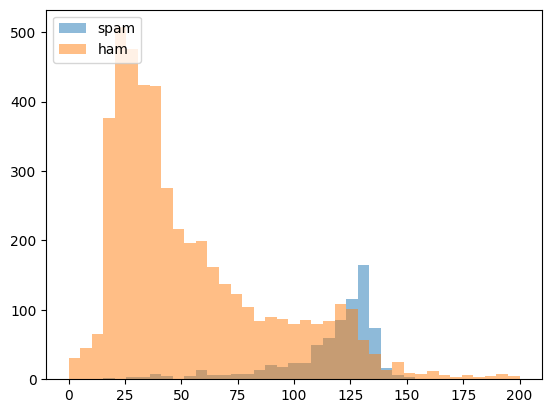

In [99]:
bins = np.linspace(0, 200, 40)

plt.hist(spam_dataset[spam_dataset['label']=='spam']['body_len'], bins, alpha=0.5, label='spam')
plt.hist(spam_dataset[spam_dataset['label']=='ham']['body_len'], bins, alpha=0.5, label='ham')
plt.legend(loc='upper left')
plt.show()

We can see that the length of the ham and spam messages are different. The spam messages tend to be longer

# Building Machine Learning Classifiers

# Read & Clean

In [101]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Splitting into train/test

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

# Vectorize text

In [109]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.columns = X_train_vect.columns.astype('str')
X_test_vect.columns = X_test_vect.columns.astype('str')

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200
0,119,2.5,0.103589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60,3.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,12.0,0.363014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,3.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88,4.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Final evaluation of models

In [107]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [110]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 12.712 / Predict time: 0.189 ---- Precision: 1.0 / Recall: 0.837 / Accuracy: 0.978


In [112]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 189.952 / Predict time: 0.247 ---- Precision: 0.913 / Recall: 0.824 / Accuracy: 0.965


Both Random Forest and Gradient Boosting are performing well for this classification problem. We have to chose the model based on whether precision is important or recall is important